In [ ]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

train = pd.read_csv("/home/mshaban/DeployedProjects/Predictive-Analysis/data/test.csv", parse_dates=['Date'])
test = pd.read_csv("/home/mshaban/DeployedProjects/Predictive-Analysis/data/train.csv", parse_dates=['Date'])

print(train.keys())
print(test.keys())

print("Missing in test: ", set(train.keys())-set(test.keys()))

DAYS = ["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"]

In [ ]:
# histogram of sales

sales = train.loc[train.Open==1].Sales.values

plt.hist(sales, bins=100)
plt.xlabel("Sales")
plt.ylabel("Occurences")
plt.show()

In [ ]:
sales = train.loc[(train.Open==1) & (train.Sales>0)].Sales.values

plt.hist(np.log(sales), bins=100)
plt.xlabel("Log Sales")
plt.ylabel("Occurences")
plt.show()

In [ ]:
for weekday in range(1,8):
    sales = train.loc[(train.Open==1) & (train.Sales>0) & (train.DayOfWeek==weekday)].Sales.values
    plt.hist(np.log(sales), bins=100, label=DAYS[weekday-1], alpha=0.5)
plt.legend()
plt.xlabel("Log Sales")
plt.ylabel("Occurences")
plt.show()

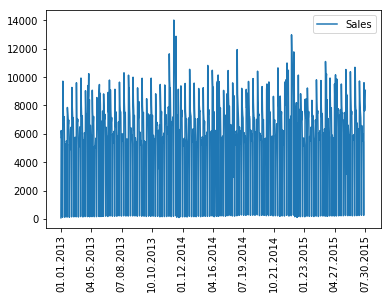

In [2]:
# print average sales for a day

def plot_col_avg(df, col, label):
    # return std dev of values
    data = df.groupby(df.Date)[col].mean()
    data = data.reset_index()
    data = data.sort_values("Date", ascending=True)
    dates = data.Date.dt.strftime("%m.%d.%Y")
    # get index and values
    x = data.index.values
    y = data[col].values
    plt.plot(x, y, label=label)
    steps = int(len(y)/10)
    plt.xticks(list(range(0, len(y), steps)), dates[::steps], rotation='vertical')
    
    
plot_col_avg(train, "Sales", "Sales")
plt.legend()
plt.show()
plt.clf()


# 
    

In [ ]:
# only certain weekdays
for weekday in range(1, 8):
    df = train.loc[train.DayOfWeek==weekday]
    df.reset_index(inplace=True)
    plot_col_avg(df, "Sales", DAYS[weekday-1])
plt.legend()
plt.show()
plt.clf()



In [ ]:
# for all weekdays but sundays

df = train.loc[train.DayOfWeek!=7]
df.reset_index(inplace=True)
std_no_sunday = plot_col_avg(df, "Sales", "WD Mo-Sa")
plt.legend()
plt.show()
plt.clf()

In [ ]:
# plot a random store

df25 = train.loc[train.Store==25]
for weekday in range(1, 8):
    df = df25.loc[train.DayOfWeek==weekday]
    df.reset_index(inplace=True)
    std = plot_col_avg(df, "Sales", DAYS[weekday-1])
plt.legend()
plt.title("Store 25")
plt.show()
plt.clf()

In [ ]:
# The same but only if its open
# plot a random store

df25 = train.loc[(train.Store==25) & (train.Open==1)]
weekday_std = []
for weekday in range(1, 7):
    df = df25.loc[train.DayOfWeek==weekday]
    df.reset_index(inplace=True)
    std = plot_col_avg(df, "Sales", DAYS[weekday-1])
    weekday_std.append(std)
plt.legend()
plt.title("Store 25")
plt.show()
plt.clf()

In [ ]:
# for each weekday: plot histogram of std dev among stores


store_day_std = train.groupby(["Store", "DayOfWeek"])["Sales"].std().to_frame()
store_day_std.rename(columns={"Sales": "Std dev"}, inplace=True)
store_day_std.reset_index(inplace=True)
avg_store_wd_std = store_day_std.groupby("DayOfWeek")["Std dev"].mean()

print(avg_store_wd_std)
weekay_std_per_store = avg_store_wd_std.values



In [ ]:

print(train.groupby("DayOfWeek")["Sales"].std())
weekday_std = train.groupby("DayOfWeek")["Sales"].std().values

In [ ]:
len(avg_store_wd_std)

In [ ]:


ticks = np.array(list(range(1,8)))
print(weekday_std)
plt.bar(ticks,  weekday_std, label="Among all", width=0.6)
plt.bar(ticks+0.2,  avg_store_wd_std, label="Avg for single stores", width=0.6, alpha=0.5)
plt.xticks(ticks, DAYS)
plt.legend()
plt.show()
plt.clf()

In [3]:
import os
os.listdir()

features = pd.read_csv('final_train.csv', parse_dates=['Date'])



In [4]:
FEATURES = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday',
            'SchoolHoliday', 'WeekOfYear', 'StoreType',
            'Assortment', 'CompetitionDistance', 'Promo2', 'AvgSales']

ftrain = features[FEATURES+["Sales"]]

<Figure size 432x288 with 0 Axes>

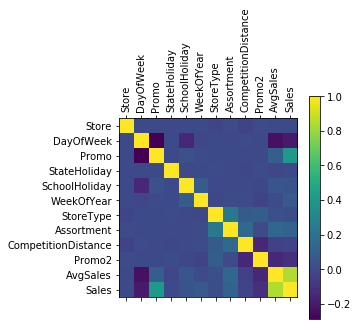

In [5]:


plt.matshow(ftrain.corr())
plt.xticks(list(range(len(FEATURES)+1)), FEATURES+["Sales"], rotation='vertical')
plt.yticks(list(range(len(FEATURES)+1)), FEATURES+["Sales"])
plt.colorbar()
plt.show()
plt.clf()

# Todo
- Visualize predictions
    - Single forecaster:
        - Timeline of one store except sunday vs sales
        - Scatter plot of sales vs predictions
    - Models with different hyper parameters
        - Different timelines in one plot
        

In [81]:

samples = pd.read_csv("predictions/params-validation-df.csv", parse_dates=["Date"])
#hp = pd.read_csv('predictions/hyper-params-pred-XGBForecaster-24.csv')

samples = samples.sort_values("Date")
order = samples.index
samples.reset_index(inplace=True)

def parse_pred(s):
    s = s["pred"]
    s = s[1:-1].split(" ")
    s = [i for i in s if i != ""]
    s = [float(i) for i in s]
    return np.array(s)[order]
    
#parse_pred(hp.iloc[0])


In [92]:
order
df = pd.read_csv("predictions/params-validation-df.csv", parse_dates=["Date"])
df.iloc[order]

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,trained
742,1014984,5,3,2013-01-02,9.355380,577,1,0,3,1,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
277,1013869,5,4,2013-01-03,9.150468,491,1,0,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
234,1012754,5,5,2013-01-04,9.402007,533,1,0,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
382,1011639,5,6,2013-01-05,8.371489,202,1,0,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
642,1009409,5,1,2013-01-07,9.850518,717,1,1,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
753,1008294,5,2,2013-01-08,9.651374,613,1,1,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
578,1007179,5,3,2013-01-09,9.695172,697,1,1,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
303,1006064,5,4,2013-01-10,9.516993,596,1,1,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
46,1004949,5,5,2013-01-11,9.548498,562,1,1,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False
652,1003834,5,6,2013-01-12,8.473069,223,1,0,3,0,...,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0.0,False


In [89]:
# visualize single forecaster
import json

# samples = features.loc[features.Store==5][FEATURES+["Sales", "Date"]]

def add_preds(pred):
    df = samples.copy()
    df["Prediction"] = parse_pred(pred)
    df = df[df.Sales>0]
    #print(df)
    try:
        df = df.drop(["index", "level_0"], axis=1)
    except Exception as e:
        print(e)
    df.reset_index(inplace=True)
    return df

def visualize_tm(df, label="", plot_sales=True):
    if plot_sales:
        plot_col_avg(df, "Sales", "Sales")
    plot_col_avg(df, "Prediction", label)

def visualize_sc(df, label=None):
    sales = df.Sales.values
    predictions = df.Prediction.values
    plt.scatter(sales, predictions, s=7, label=label, alpha=0.5)
    plt.plot([np.min(sales), np.max(sales)], [np.min(sales), np.max(sales)])
    plt.xlabel("Log Sales")
    plt.ylabel("Log Predictions")

def plot_all_single_forecasters(pr):
    for item, row in pr.iterrows():
        df = add_preds(row)
        visualize_tm(df)
        plt.legend(); plt.show(); plt.clf()
        
        visualize_sc(df)
        plt.legend(); plt.show(); plt.clf()

def all_together(pr, modelname=None):
    for model_id, row in pr.iterrows():
        df = add_preds(row)
        modelname =  row["model_name"]
        visualize_tm(df, label="{} {}".format(modelname, model_id), plot_sales=(model_id==1))
    plt.legend(); plt.show(); plt.clf()
    for model_id, row in pr.iterrows():
        df = add_preds(row)
        modelname =  row["model_name"]
        visualize_sc(df, label="{} {}".format(modelname, model_id))
    plt.legend(); plt.show(); plt.clf()
        

In [67]:
pred_files = {"XGB": "hyper-params-pred-XGBForecaster-24.csv",
             "MDN": "hyper-params-pred-MDNetwork-92.csv",
             "FFN": "hyper-params-pred-FeedForward-2.csv"
             }
model_preds = {}
for model_name, file in pred_files.items():
    pred = pd.read_csv("predictions/"+file)
    pred["model_name"] = model_name
    model_preds[model_name] = pred
    
all_preds = pd.concat(model_preds.values(), ignore_index=True)    



In [84]:
all_preds
0

0

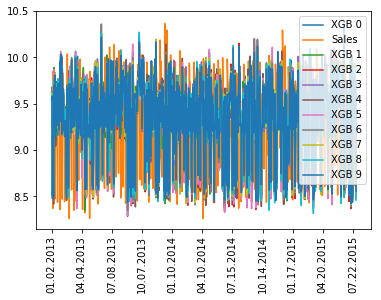

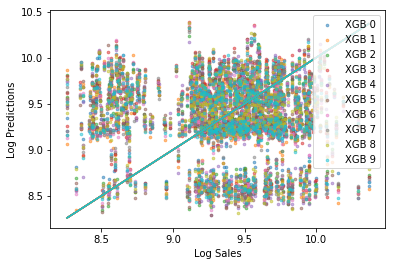

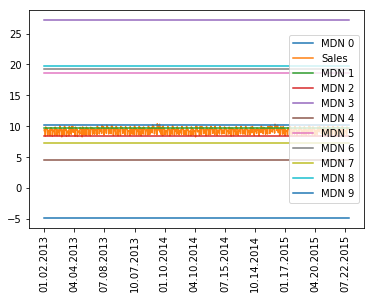

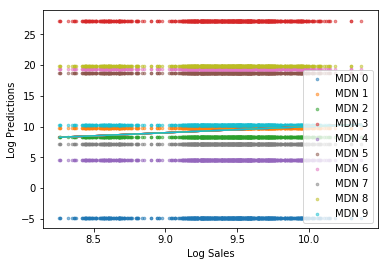

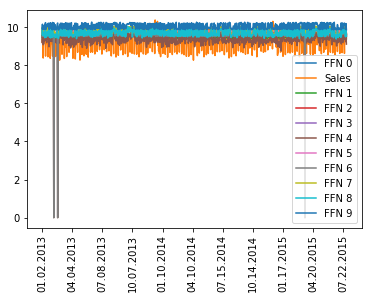

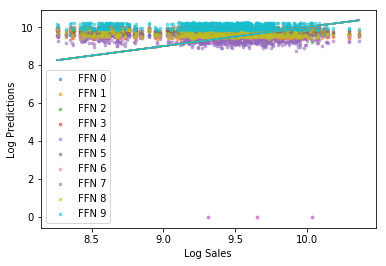

In [90]:
for pred in model_preds.values():
    
    all_together(pred)


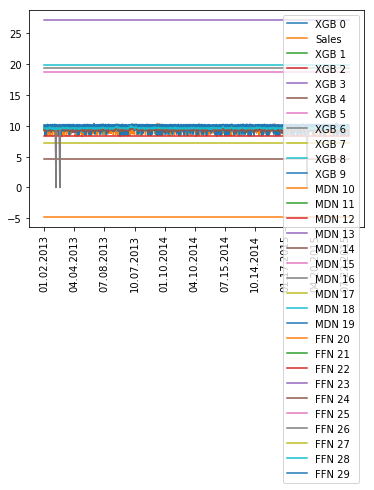

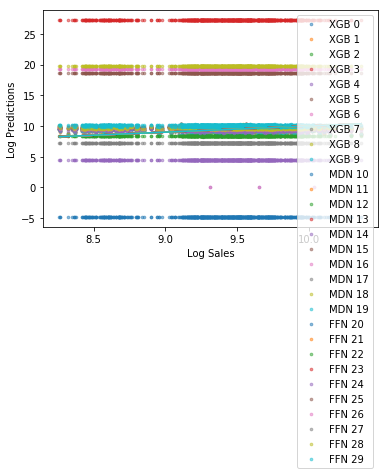

In [93]:
all_together(all_preds)

In [37]:

hp = pd.read_csv('predictions/hyper-params-pred-XGBForecaster-24.csv')
ms = pd.read_csv('predictions/model_score_XGBForecaster-24.csv')
os.listdir(r'predictions/')

['hyper-params-pred-XGBForecaster-24.csv',
 'model_score_XGBForecaster-24.csv',
 'best-hyper-params-scores-92.csv',
 'best-hyper-params-scores-2.csv',
 'test',
 'model_score_FeedForward-2.csv',
 'model_score_MDNetwork-92.csv',
 'hyper-params-pred-FeedForward-2.csv',
 'hyper-params-pred-MDNetwork-92.csv',
 'params-validation-df.csv',
 'best-hyper-params-scores-24.csv']

In [96]:
file = 'model_score_FeedForward-2.csv'
pd.read_csv("predictions/"+file)

,model_name,params,score
0,FeedForward,"{'n_layers': 3, 'activation': 'sigmoid', 'unit...",0.363965
1,FeedForward,"{'n_layers': 1, 'activation': 'sigmoid', 'unit...",0.304304
2,FeedForward,"{'n_layers': 2, 'activation': 'tanh', 'units':...",0.297524
3,FeedForward,"{'n_layers': 4, 'activation': 'tanh', 'units':...",0.300576
4,FeedForward,"{'n_layers': 1, 'activation': 'tanh', 'units':...",0.322771
5,FeedForward,"{'n_layers': 4, 'activation': 'sigmoid', 'unit...",0.332778
6,FeedForward,"{'n_layers': 5, 'activation': 'tanh', 'units':...",0.306787
7,FeedForward,"{'n_layers': 5, 'activation': 'sigmoid', 'unit...",0.300515
8,FeedForward,"{'n_layers': 1, 'activation': 'tanh', 'units':...",0.305965
9,FeedForward,"{'n_layers': 4, 'activation': 'tanh', 'units':...",0.393514


In [101]:
score_files = {"XGB": "model_score_XGBForecaster-24.csv",
             "MDN": "model_score_MDNetwork-92.csv",
             "FFN": "model_score_FeedForward-2.csv"
             }
scores = {}
for model_name, file in score_files.items():
    s = pd.read_csv("predictions/"+file)
    scores[model_name] = s


In [102]:
scores["XGB"]

,model_name,params,score
0,XGBForecaster,"{'max_depth': 10, 'eta': 0.2, 'booster': 'gbtr...",0.015255
1,XGBForecaster,"{'max_depth': 15, 'eta': 0.25, 'booster': 'gbt...",0.013944
2,XGBForecaster,"{'max_depth': 12, 'eta': 0.25, 'booster': 'gbt...",0.014184
3,XGBForecaster,"{'max_depth': 12, 'eta': 0.1, 'booster': 'gbtr...",0.017955
4,XGBForecaster,"{'max_depth': 15, 'eta': 0.3, 'booster': 'gbtr...",0.014535
5,XGBForecaster,"{'max_depth': 12, 'eta': 0.3, 'booster': 'gbtr...",0.013777
6,XGBForecaster,"{'max_depth': 20, 'eta': 0.1, 'booster': 'gbtr...",0.014804
7,XGBForecaster,"{'max_depth': 20, 'eta': 0.1, 'booster': 'gbtr...",0.014834
8,XGBForecaster,"{'max_depth': 12, 'eta': 0.25, 'booster': 'gbt...",0.013809
9,XGBForecaster,"{'max_depth': 17, 'eta': 0.1, 'booster': 'gbtr...",0.015256


In [ ]:
def score_hist(scores, bins=None):
    return plt.hist(scores.score.values, bins=None, label=scores.model_name.unique()[0])



In [ ]:
bins = score_hist(fcn_scores)
print(bins[1])
print(len(bins))
#score_hist(svr_scores, bins=bins)
#score_hist(xgb_scores, bins=bins)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.clf()